In [2]:
# 데이터프레임 패키지
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14


In [3]:
# 넘파이의 2차원 데이터 만드는 함수 사용
fish_data = np.column_stack((fish_length,fish_weight))
fish_data.shape

(49, 2)

In [4]:
# 넘파이의 원-핫 데이터 생성 함수
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
fish_target.shape

(49,)

In [5]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# 사이킷런의 데이터 분류 라이브러리 사용
# train_test_split : 랜덤하게 섞으면서 일정 비율로 훈련/테스트 데이터로 분류해준다
from sklearn.model_selection import train_test_split
# 첫번째 값 : 독립데이터(input) 전체
# 두번째 값 : 종속(정답)데이터(target) 전체
# 세번쨰 값 : 훈련과 테스트를 분류할 비율 지정(테스트=30, 훈현=70)
# 네번째 값 : 랜덤 규칙
# 반환되는 값은 4개 : train_input, test_input, train_target, test_target
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,test_size=0.3,random_state=42)

In [9]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(34, 2) (34,)
(15, 2) (15,)


In [10]:
# 모델 생성
kn = KNeighborsClassifier()
# 훈련
kn.fit(train_input,train_target)
# 검증
kn.score(test_input,test_target)

1.0

In [16]:
# 최종테스트 : 길이 25, 무게 150은 ?
kn.predict([[25,150]])

array([0.])

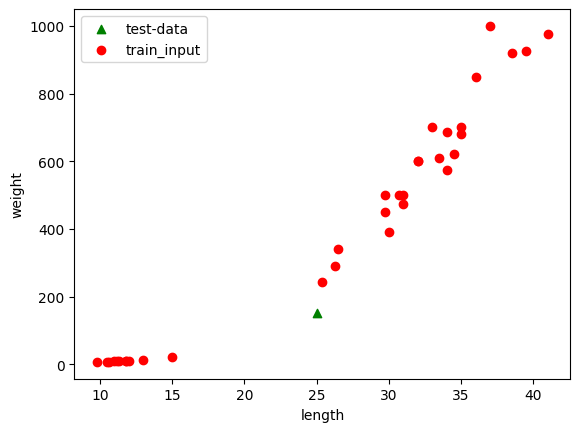

In [19]:
# train 데이터를 이용해 산점도 그리기

# 임의 값(테스트 데이터)
plt.scatter(25,150,marker="^",color="g",label="test-data")
# 훈련데이터와 테스트데이터의 input데이터 산점도
plt.scatter(train_input[:,0],train_input[:,1],color="r",label="train_input")
#plt.scatter(test_input[:,0],test_input[:,1],color="b",label="test_input")

plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

In [21]:
# 최근접 이웃 5개 값 확인
distances, idndexes = kn.kneighbors([[25,150]])
print("거리 : ", distances,"\n인덱스위치 : ", idndexes)

거리 :  [[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]] 
인덱스위치 :  [[10 27  3 17  2]]


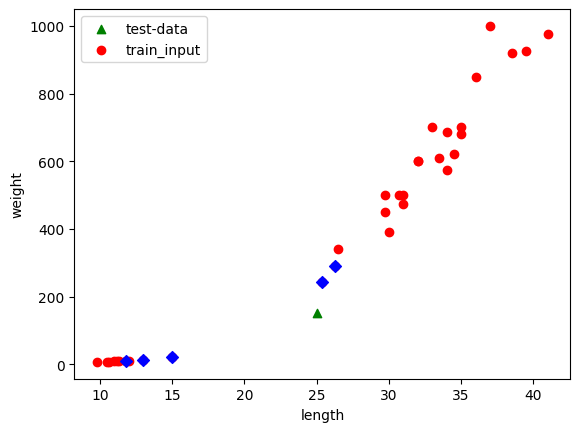

In [28]:
# 최근접 이웃 5개 값 위치 확인

# train 데이터를 이용해 산점도 그리기

# 임의 값(테스트 데이터)
plt.scatter(25,150,marker="^",color="g",label="test-data")
# 훈련데이터와 테스트데이터의 input데이터 산점도
plt.scatter(train_input[:,0],train_input[:,1],color="r",label="train_input")
plt.scatter(train_input[idndexes,0],train_input[idndexes,1],marker="D",color="b")

plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

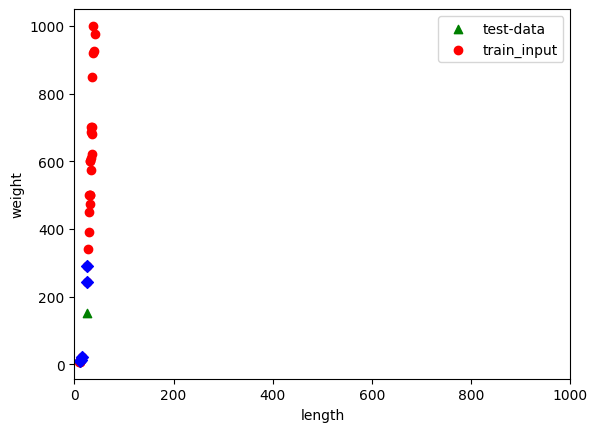

In [29]:
# 최근접 이웃 5개 값 위치 확인
# train 데이터를 이용해 산점도 그리기
# 축 범위 조절

# 임의 값(테스트 데이터)
plt.scatter(25,150,marker="^",color="g",label="test-data")
# 훈련데이터와 테스트데이터의 input데이터 산점도
plt.scatter(train_input[:,0],train_input[:,1],color="r",label="train_input")
plt.scatter(train_input[idndexes,0],train_input[idndexes,1],marker="D",color="b")

# 축 범위 같게
plt.xlim(0,1000)

plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

In [ ]:
# 단위가 서로 다른 데이터를 사용하는 경우 눈으로 확인했을 때와 결과가 다를 수 있다.
# 이를 스케일 오류라 한다.
# 오류를 해소하기 위해 정규화(표준화) 전처리 과정을 거친다
# 정규화(표준화) 과정은 머신러닝 함수 이용